(howto-visualization)=
# Visualization

(howto-visualization-cyclic-colormaps)=
## Using cyclic colormaps

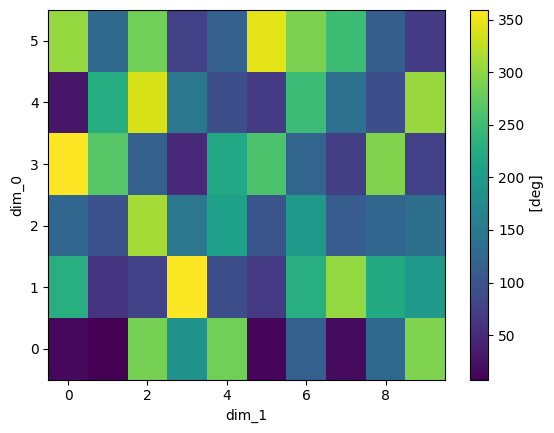

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from quantify.visualization.mpl_plotting import set_cyclic_colormap

zvals = xr.DataArray(np.random.rand(6, 10) * 360)
zvals.attrs["units"] = "deg"
zvals.plot()

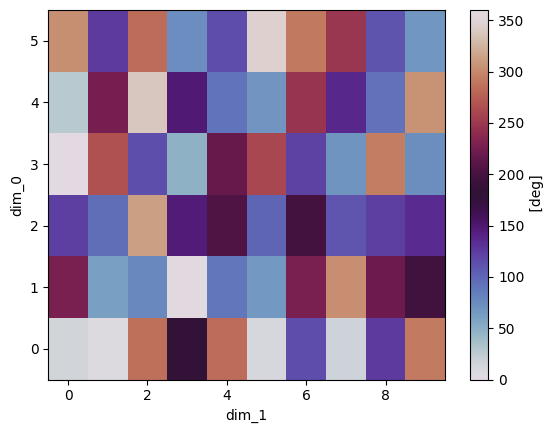

In [2]:
fig, ax = plt.subplots(1, 1)
color_plot = zvals.plot(ax=ax)
set_cyclic_colormap(color_plot)

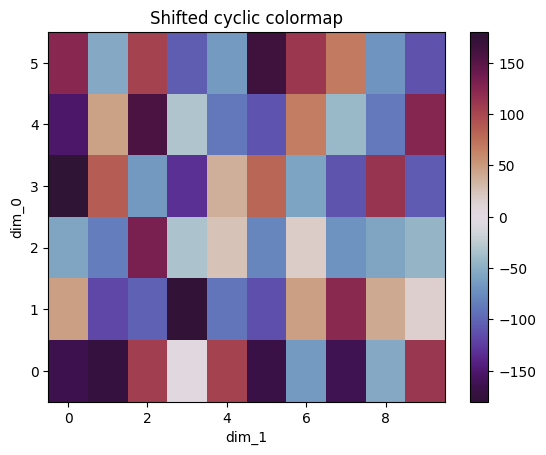

In [3]:
zvals_shifted = zvals - 180

fig, ax = plt.subplots(1, 1)
color_plot = zvals_shifted.plot(ax=ax)
ax.set_title("Shifted cyclic colormap")
set_cyclic_colormap(color_plot, shifted=zvals_shifted.min() < 0)

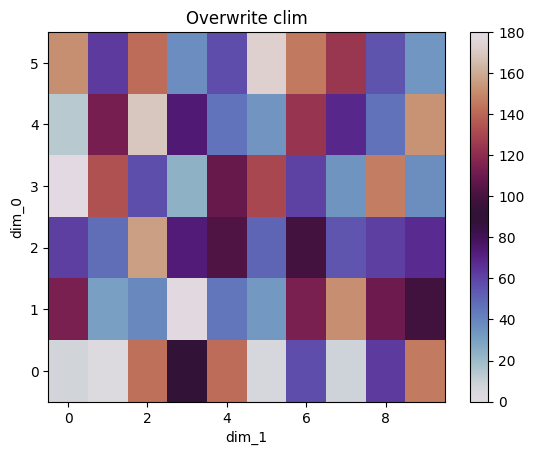

In [4]:
fig, ax = plt.subplots(1, 1)
color_plot = (zvals / 2).plot(ax=ax)
ax.set_title("Overwrite clim")
set_cyclic_colormap(color_plot, clim=(0, 180), unit="deg")

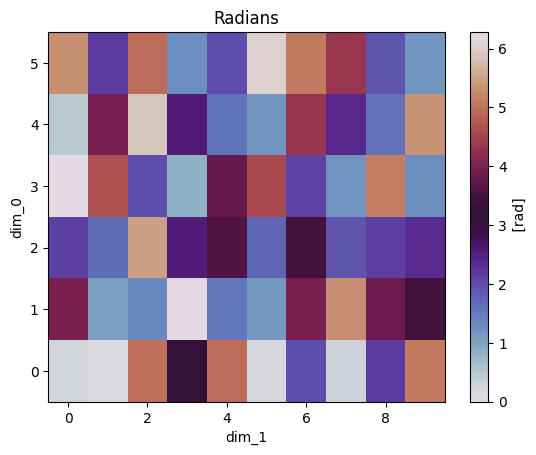

In [5]:
fig, ax = plt.subplots(1, 1)
zvals_rad = zvals / 180 * np.pi
zvals_rad.attrs["units"] = "rad"
color_plot = zvals_rad.plot(ax=ax)
ax.set_title("Radians")
set_cyclic_colormap(color_plot, unit=zvals_rad.units)

(howto-visualization-custom-colormaps)=
## Creating custom colormaps

In this example we use this function to create a custom colormap using several
base colors for which we adjust the saturation and transparency (alpha,
only visible when exporting the image).

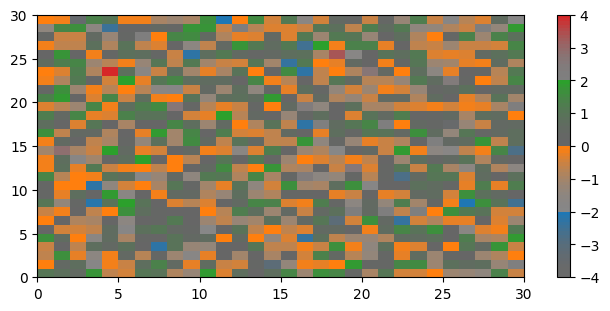

In [6]:
import colorsys

import matplotlib.colors as mplc
import matplotlib.pyplot as plt
import numpy as np

from quantify.visualization.color_utilities import set_hlsa

color_cycle = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
all_colors = []
for col in color_cycle:
    hls = colorsys.rgb_to_hls(*mplc.to_rgb(mplc.to_rgb(col)))
    sat_vals = (np.linspace(0.0, 1.0, 20) ** 2) * hls[2]
    alpha_vals = np.linspace(0.4, 1.0, 20)

    colors = [list(set_hlsa(col, s=s)) for s, a in zip(sat_vals, alpha_vals)]
    all_colors += colors

cmap = mplc.ListedColormap(all_colors)

np.random.seed(19680801)
data = np.random.randn(30, 30)

fig, ax = plt.subplots(1, 1, figsize=(6, 3), constrained_layout=True)

psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
fig.colorbar(psm, ax=ax)
plt.show()